In [ ]:
# prompt: perform random forest over data.csv

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
try:
  data = pd.read_csv('data.csv')
except FileNotFoundError:
  print("Error: 'data.csv' not found. Please upload the file to the runtime environment.")
  exit()

# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Handle missing values (replace with mean for numerical features)
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        X[col].fillna(X[col].mean(), inplace=True)
    else:
      # Handle non-numeric columns (e.g. mode or drop)
      X[col].fillna(X[col].mode()[0], inplace=True)

# Convert non-numeric features to numerical using one-hot encoding
X = pd.get_dummies(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Task
perform random forest on it

Here is all the data you need:
"data (1).csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
Load the dataset "data (1).csv" into a pandas DataFrame and print its shape and first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('data (1).csv')
    print(df.shape)
    display(df.head())
except FileNotFoundError:
    print("Error: 'data (1).csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify missing values, and examine the distribution of features. Determine the target variable.


**Reasoning**:
Examine the data shape, info, descriptive statistics, and identify the target variable. Also, check for missing values and analyze the distribution of the target variable.



In [2]:
# Check the number of rows and columns
print("Data shape:", df.shape)

# Get data types and check for missing values
print("\nData info:")
df.info()

# Summary statistics for numerical features
print("\nDescriptive statistics:")
display(df.describe())

# Identify columns with missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Target variable identification and distribution
print("\nTarget variable distribution:")
print(df['diagnosis'].value_counts())
print(df['diagnosis'].value_counts(normalize=True) * 100)

Data shape: (569, 33)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN



Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

**Reasoning**:
Analyze feature distributions, create visualizations (histograms, box plots), and calculate the correlation matrix for numerical features. Visualize the correlation matrix using a heatmap.



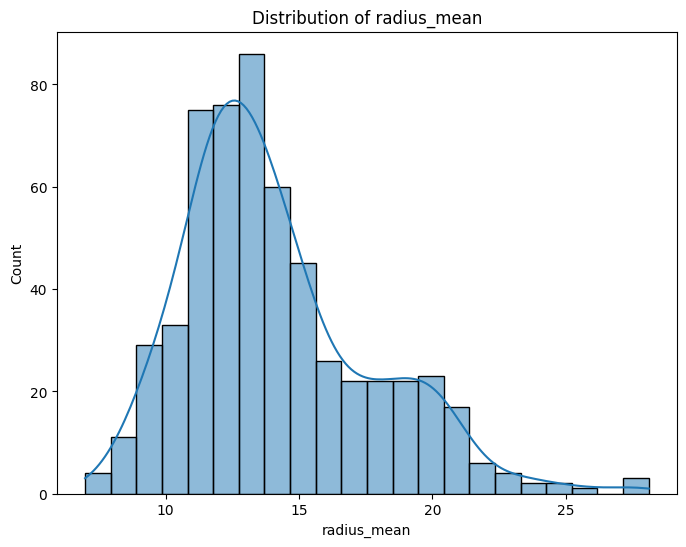

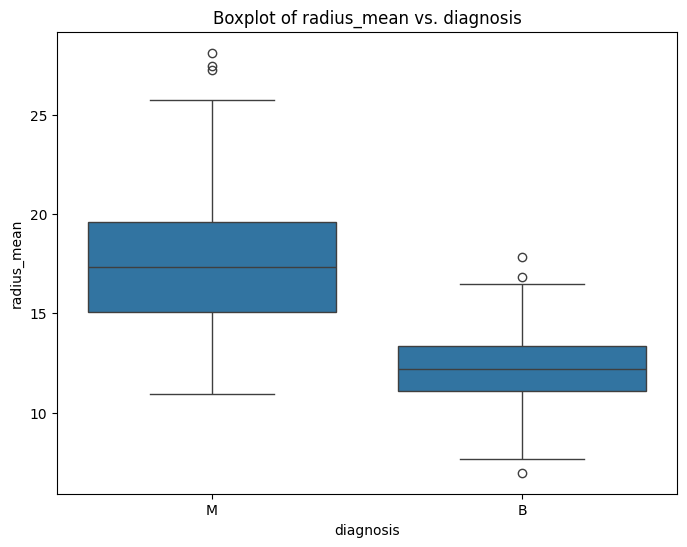

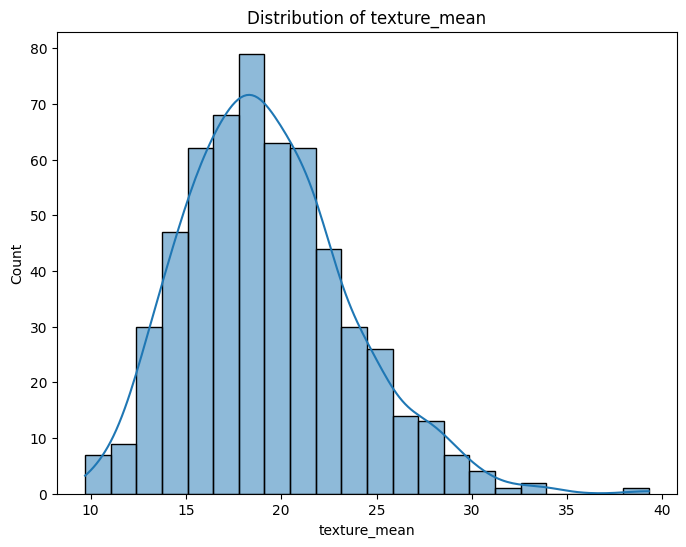

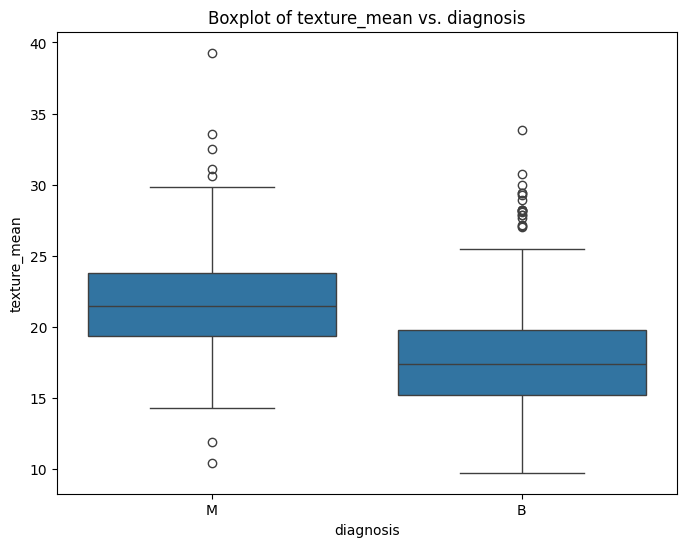

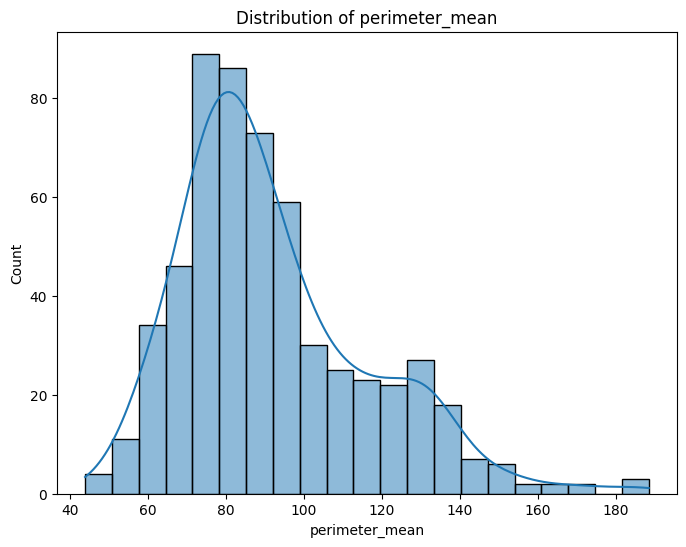

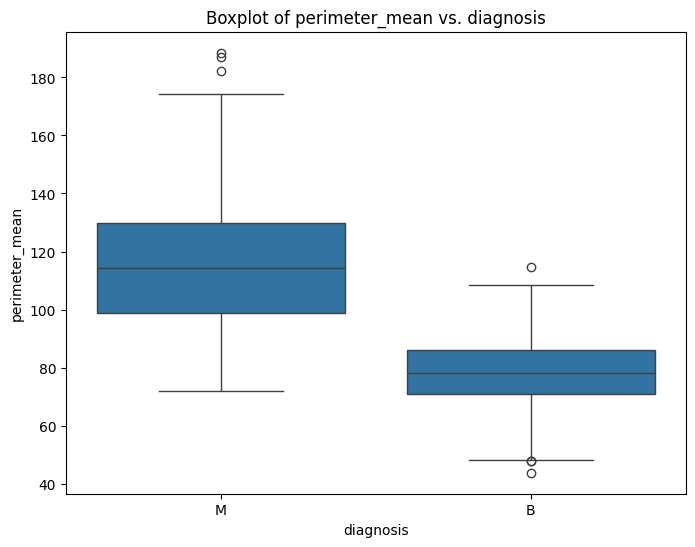

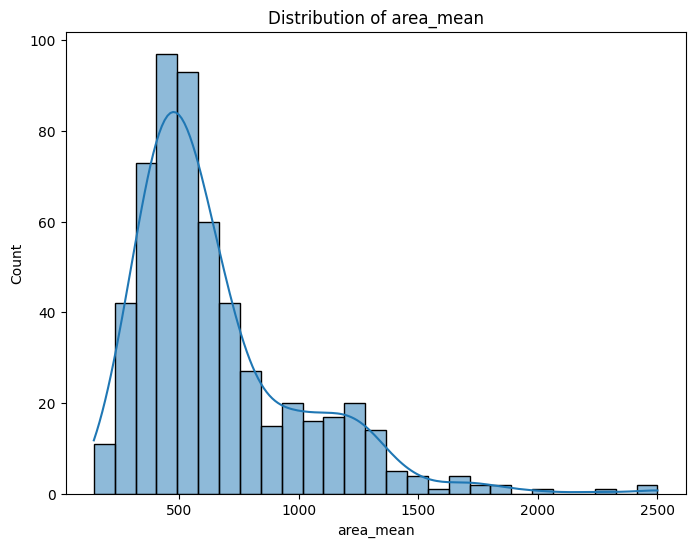

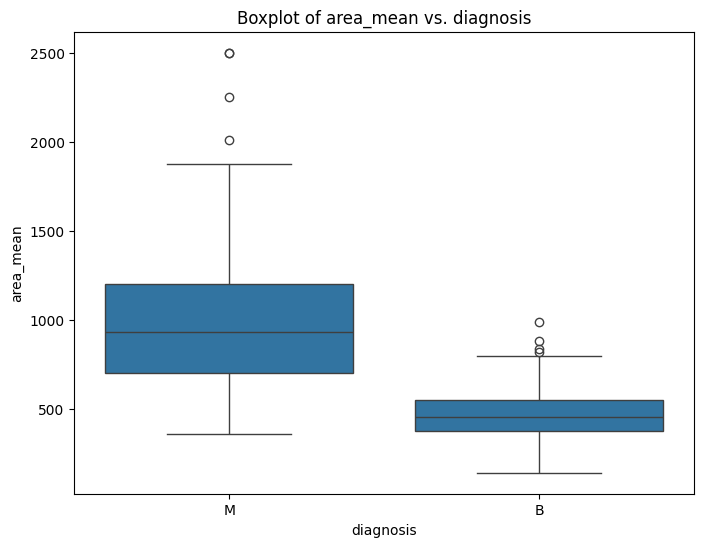

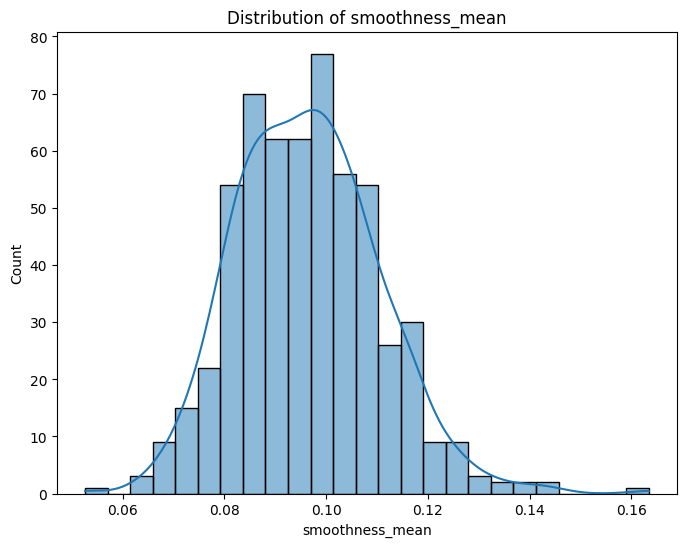

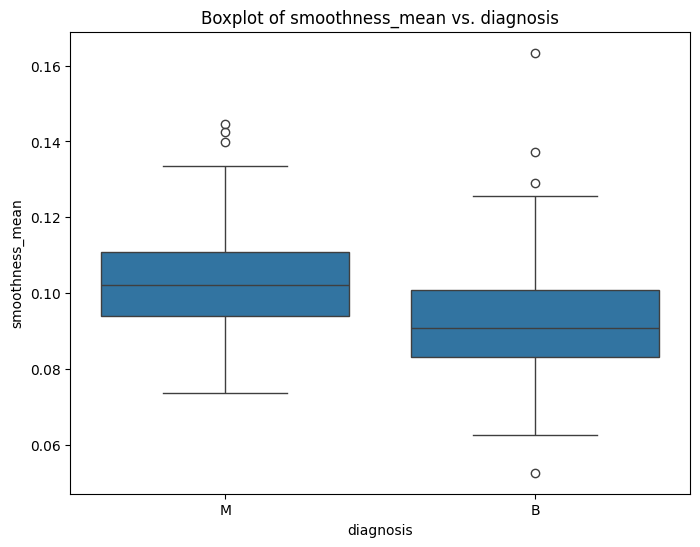

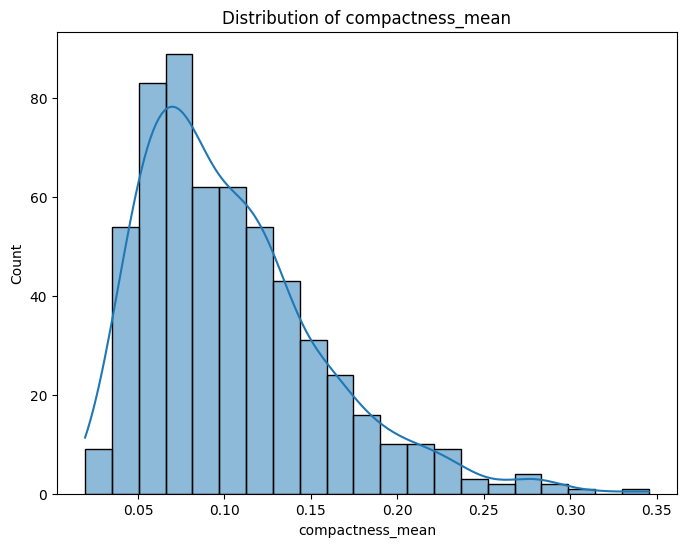

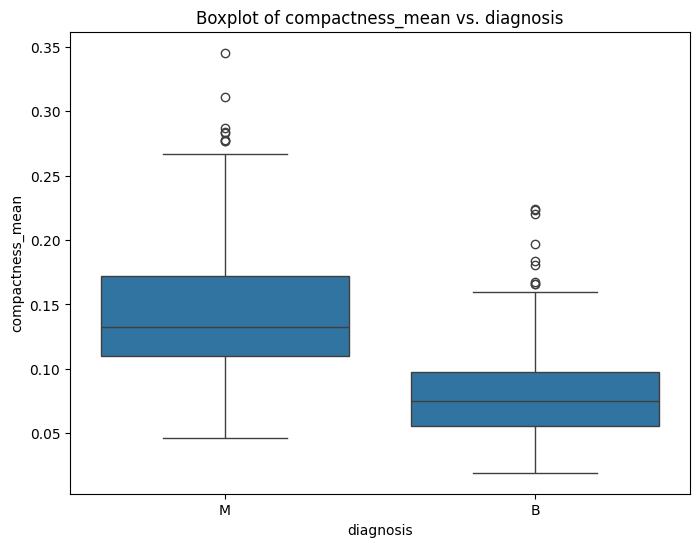

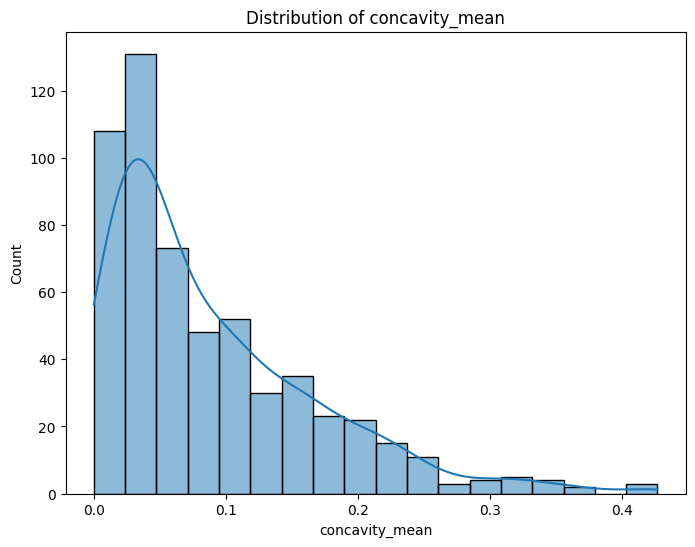

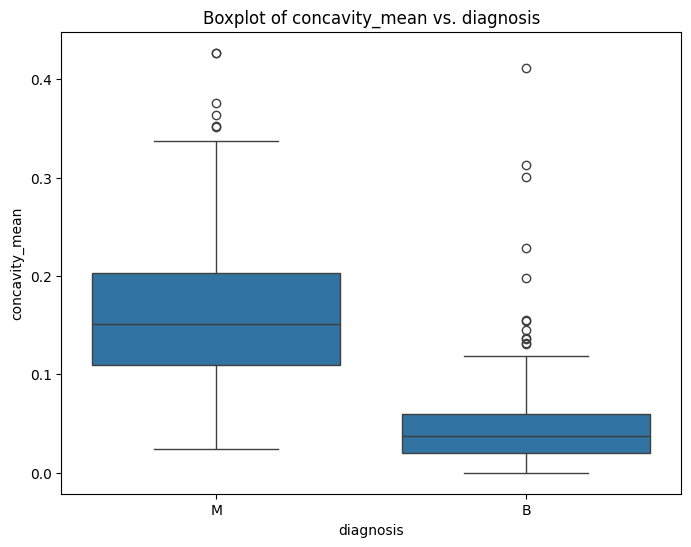

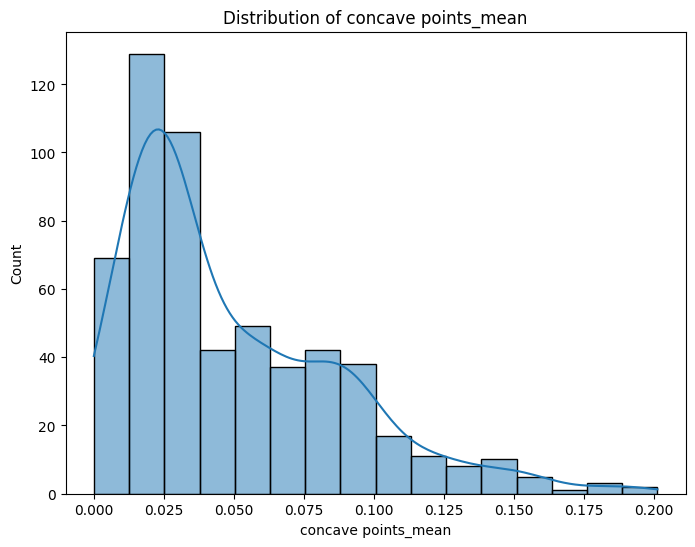

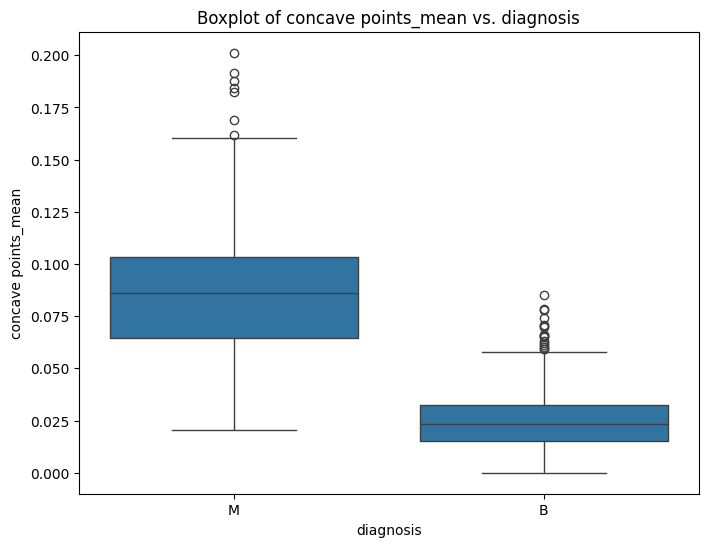

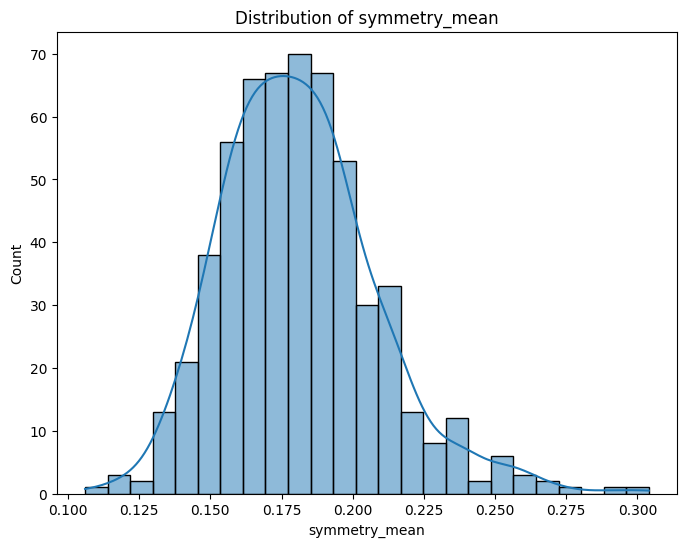

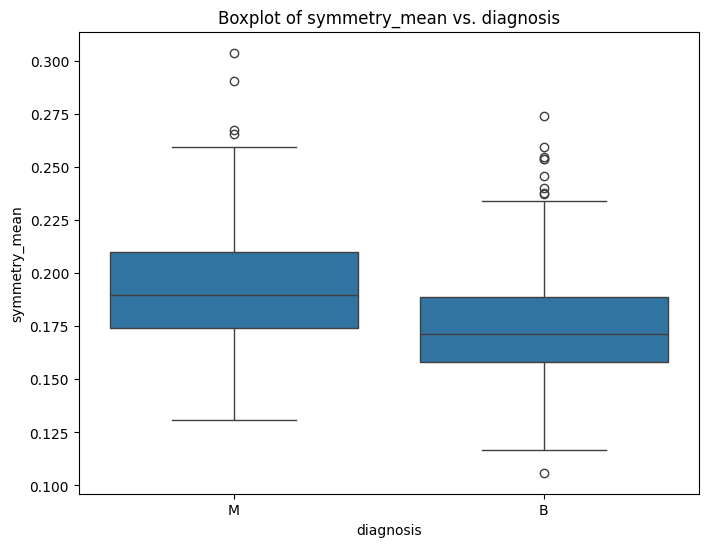

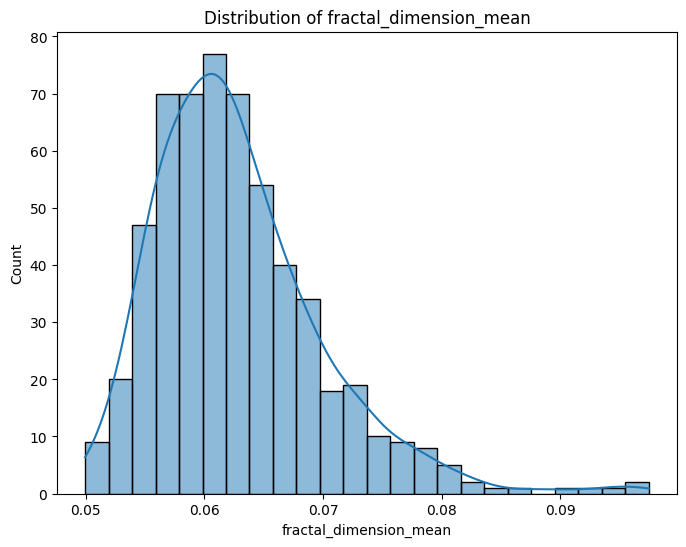

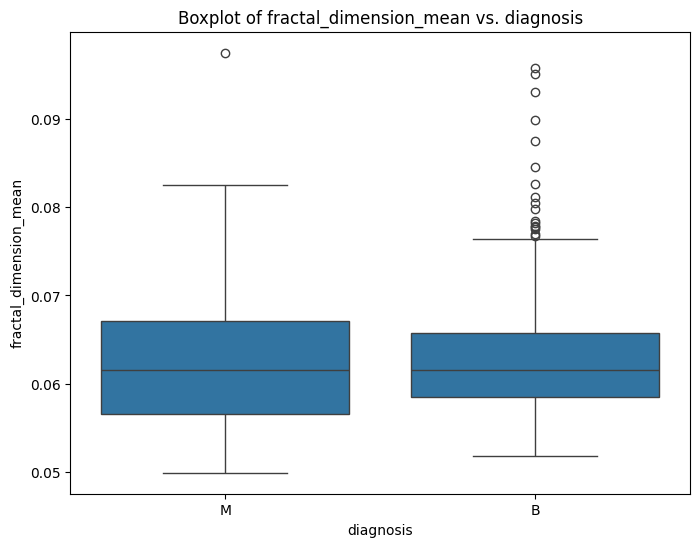

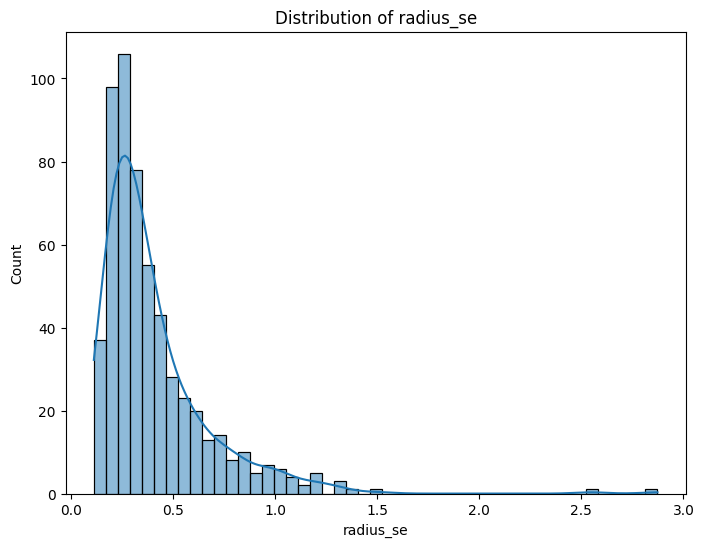

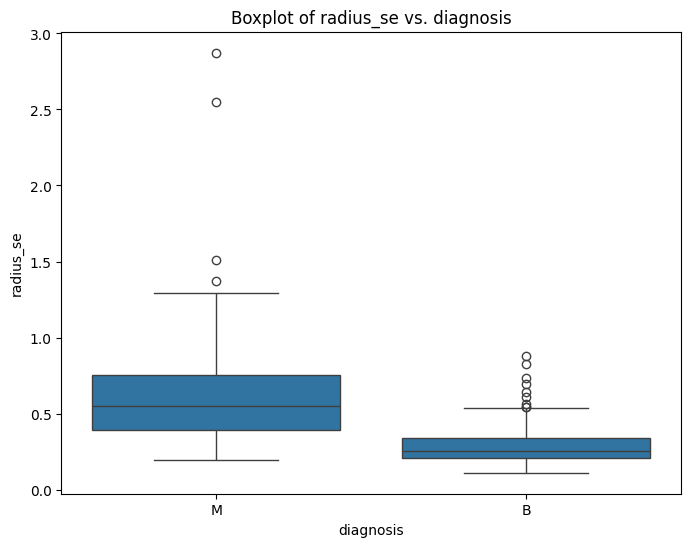

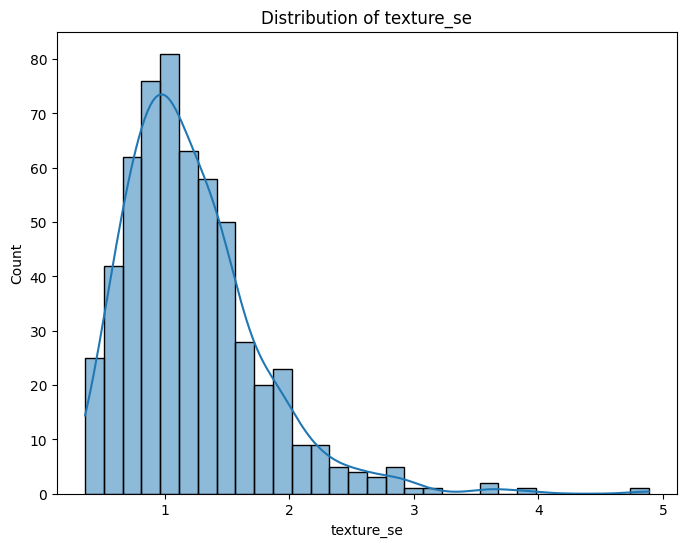

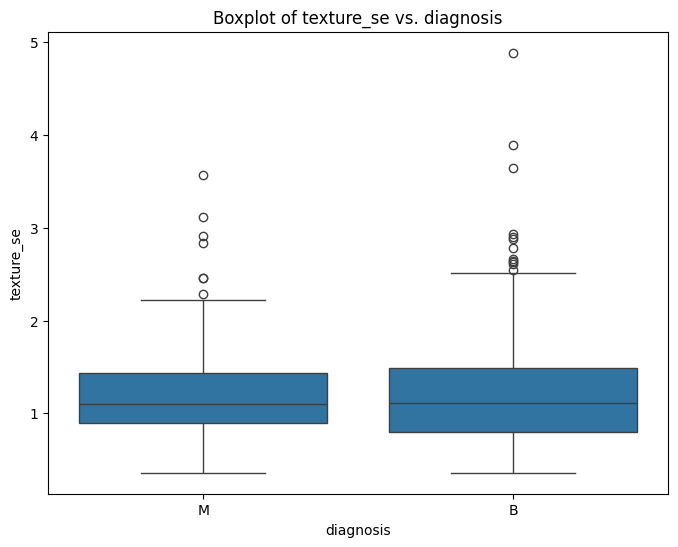

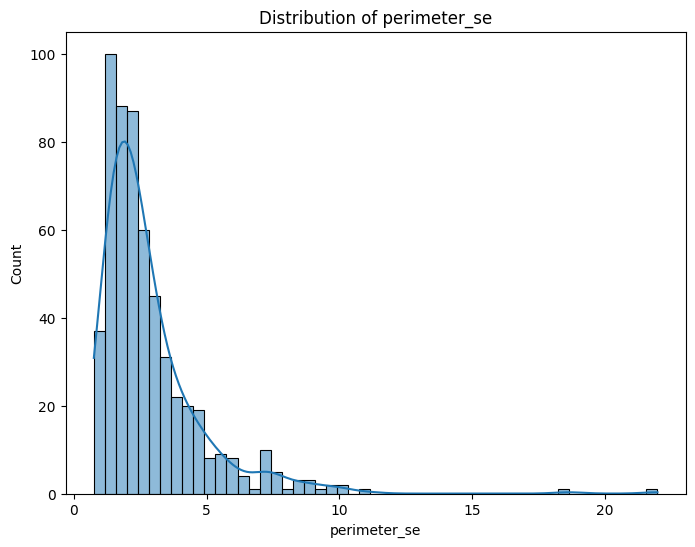

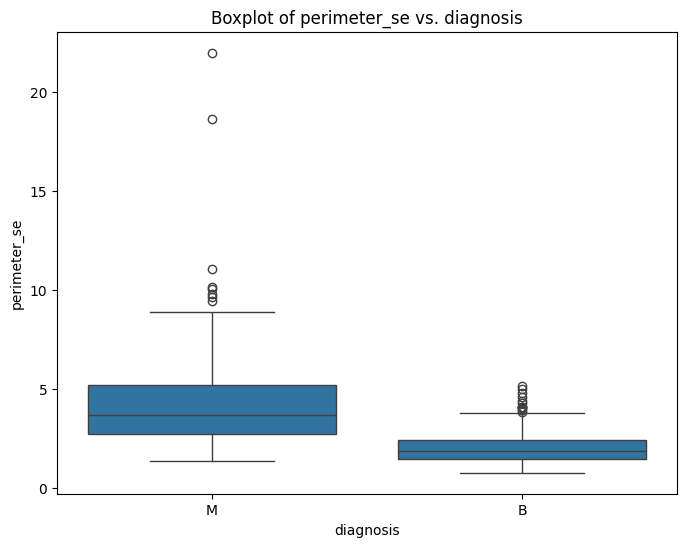

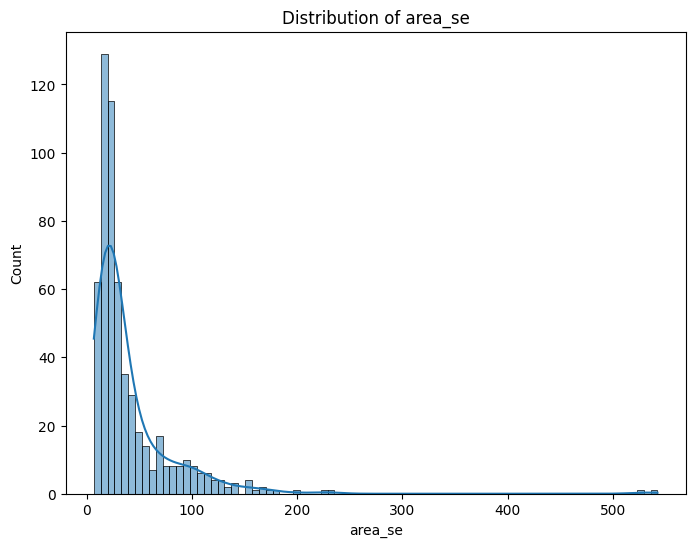

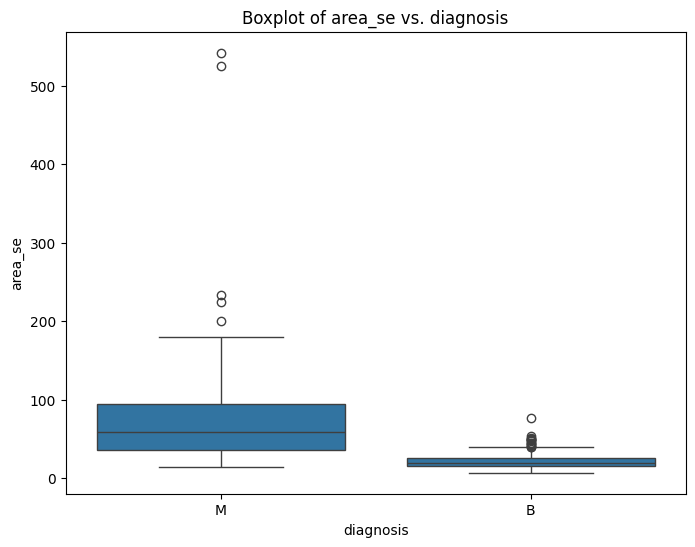

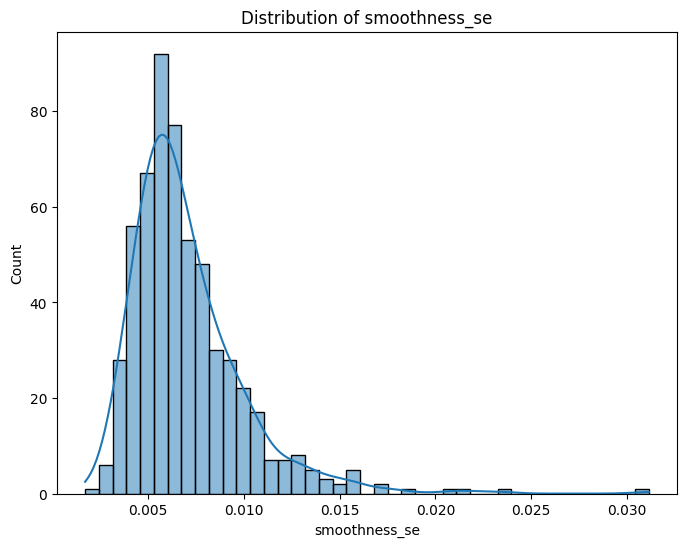

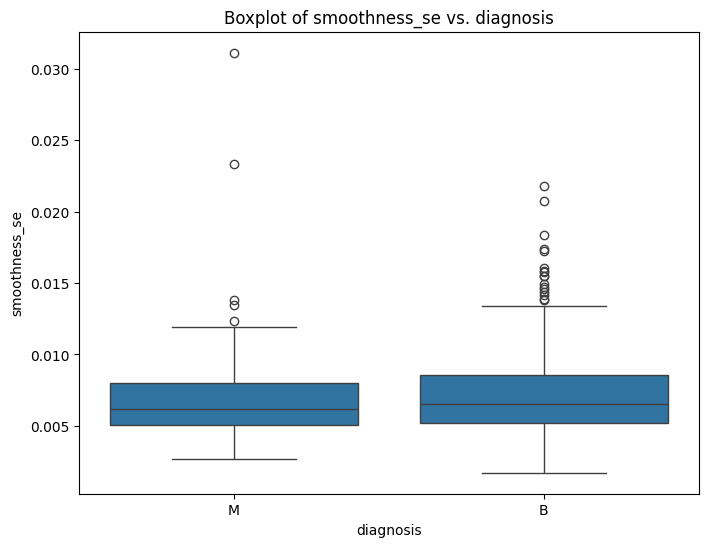

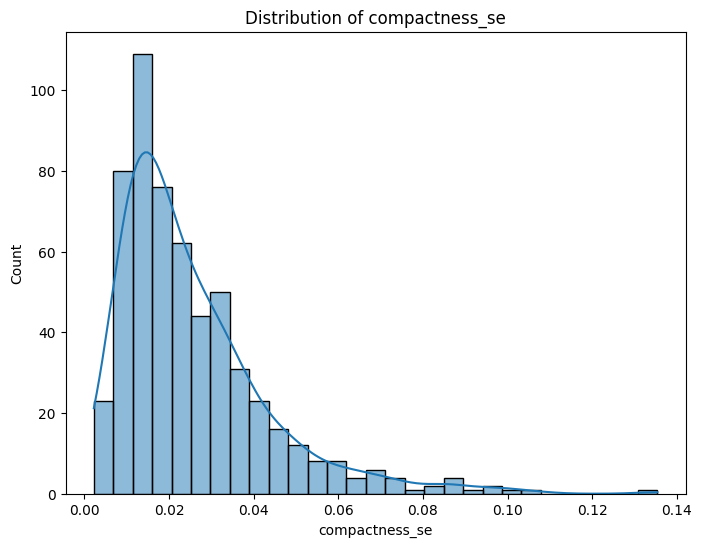

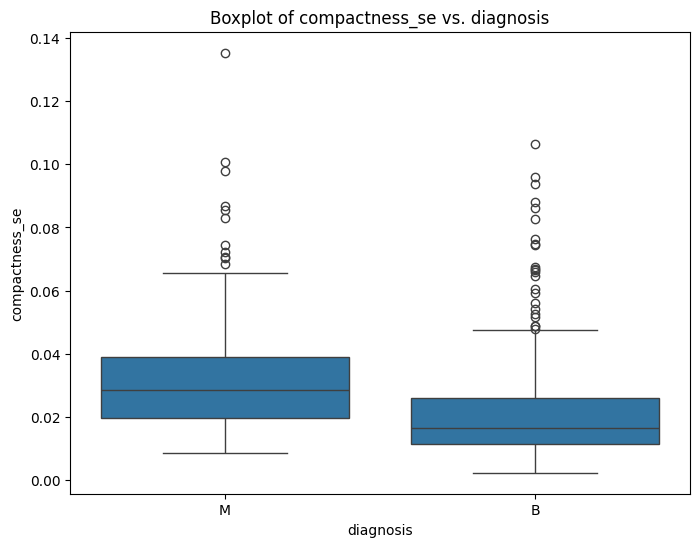

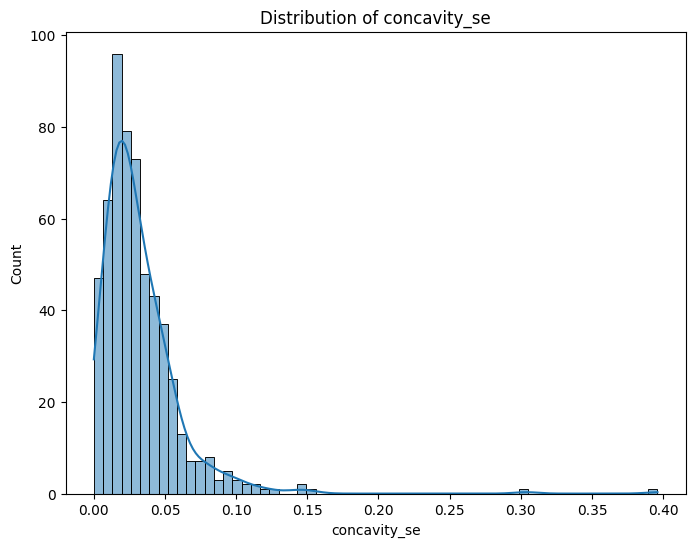

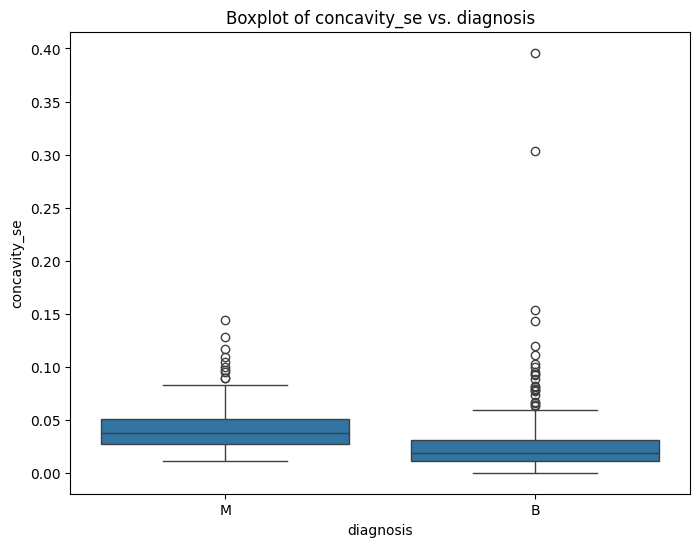

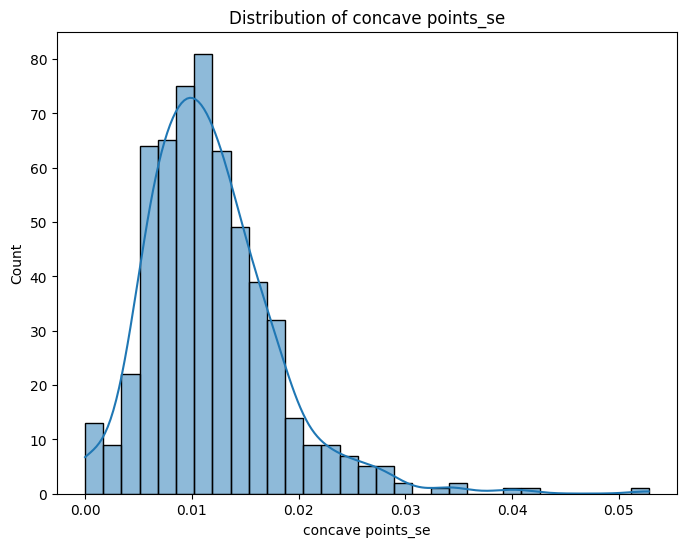

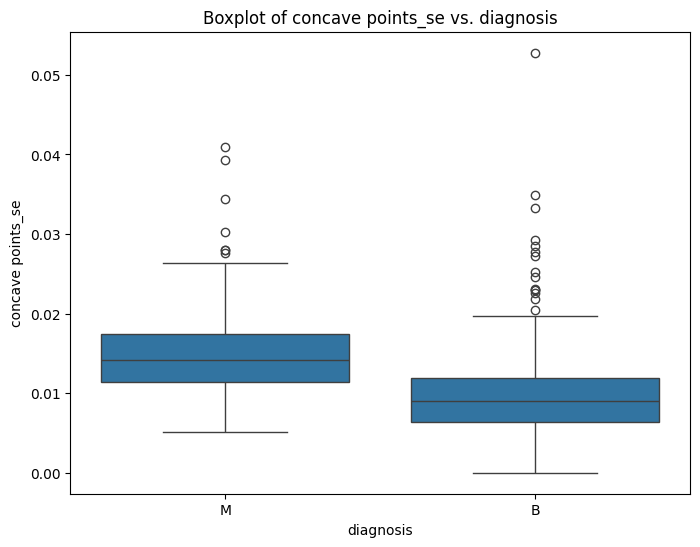

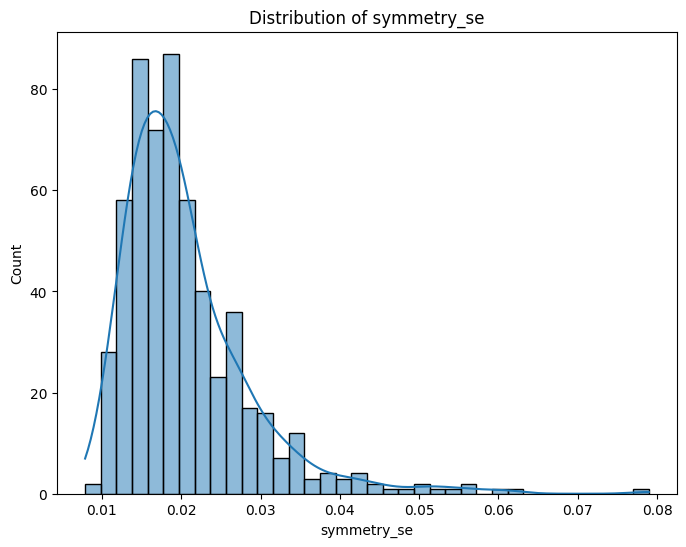

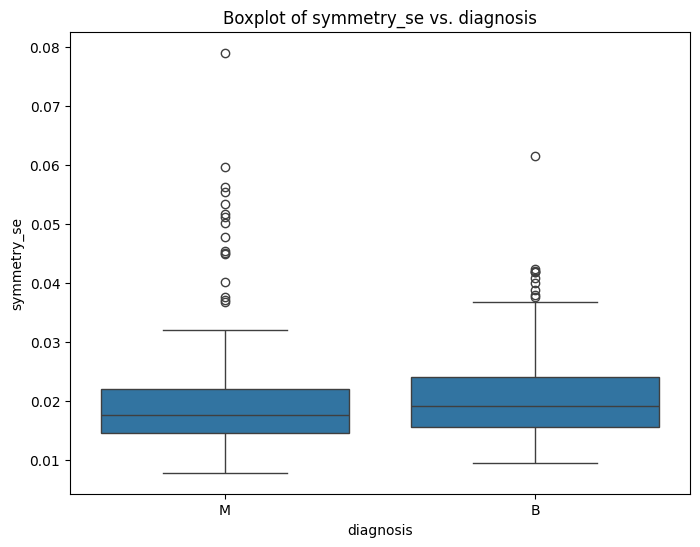

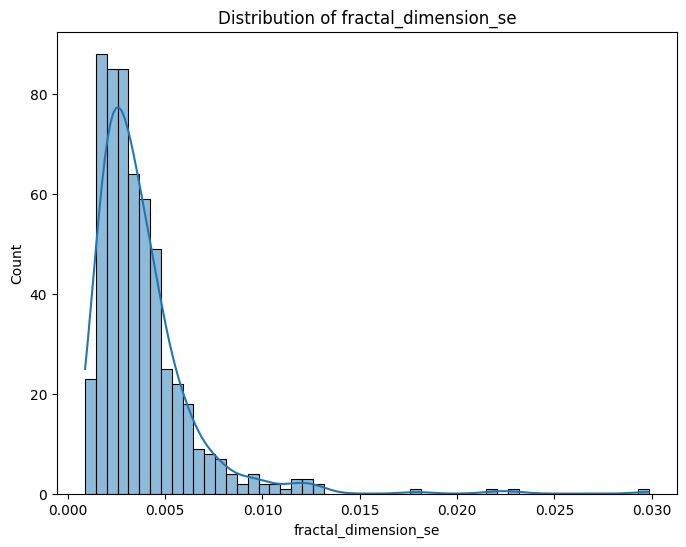

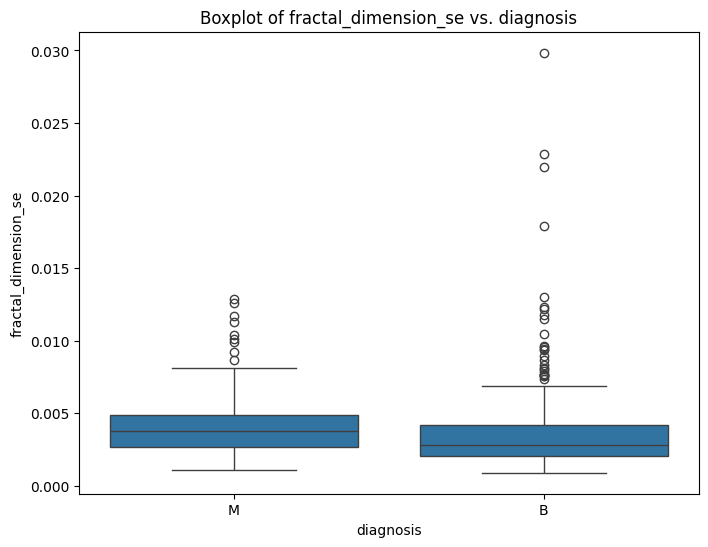

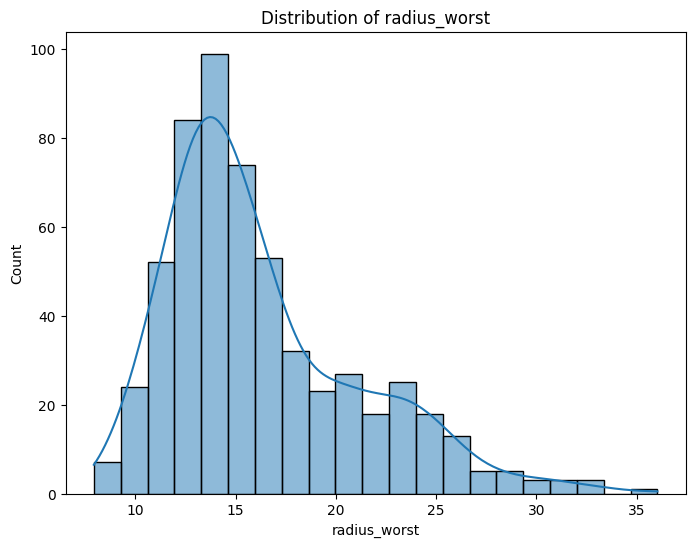

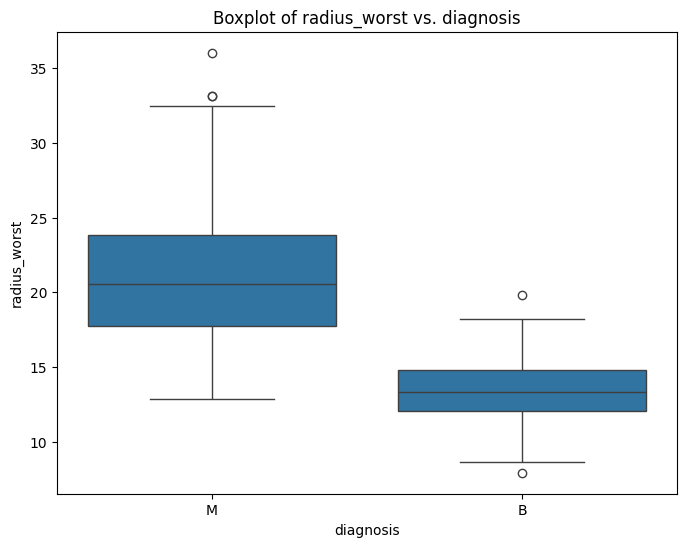

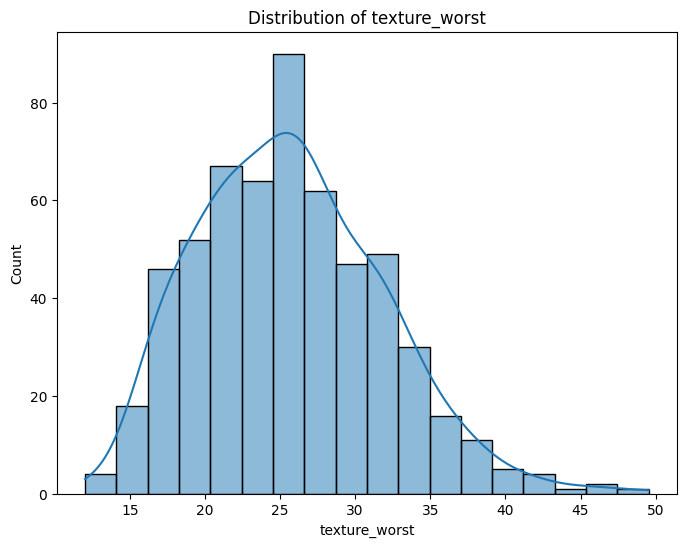

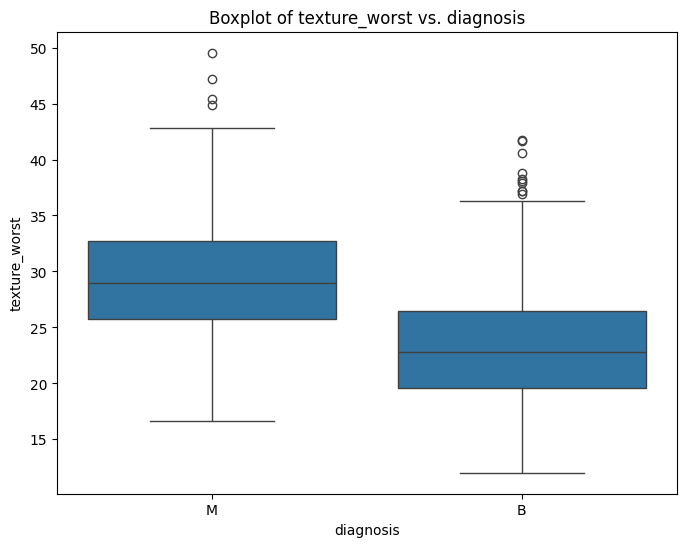

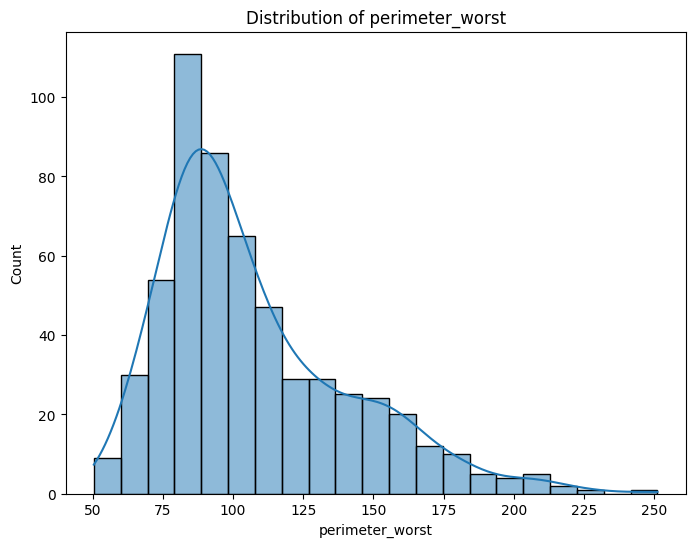

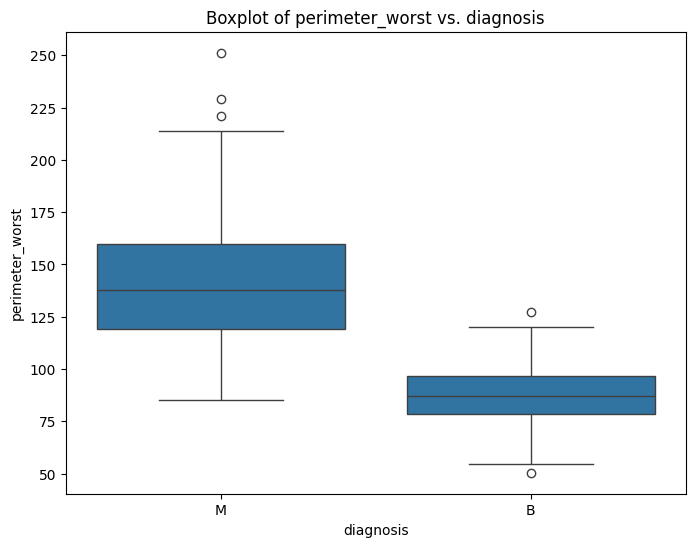

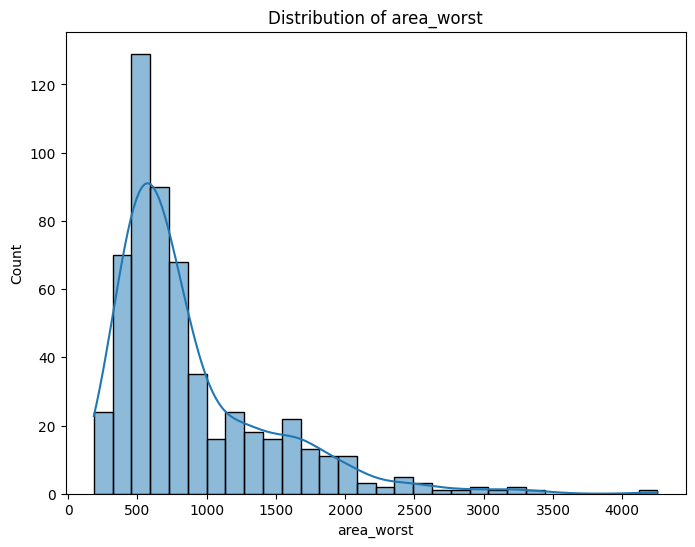

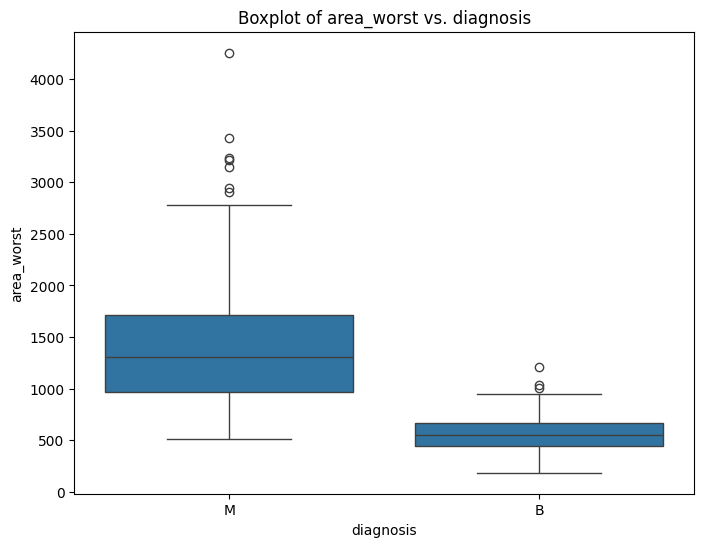

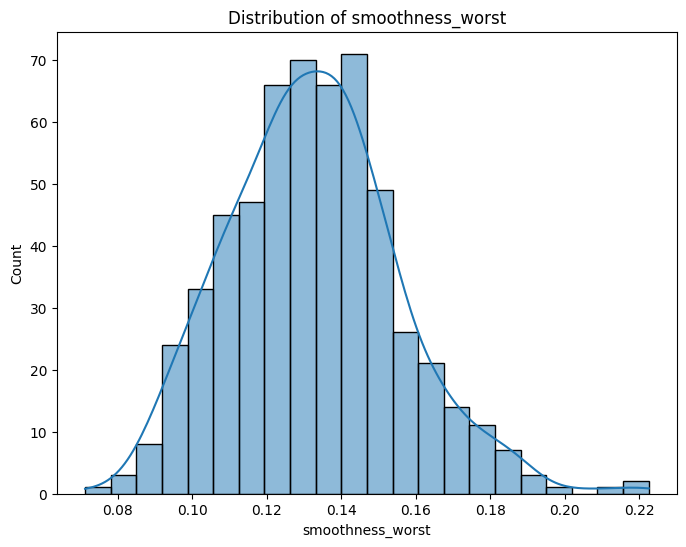

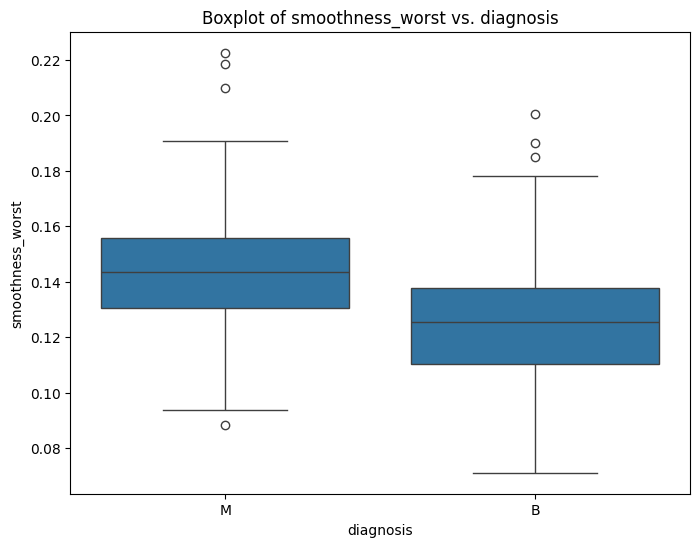

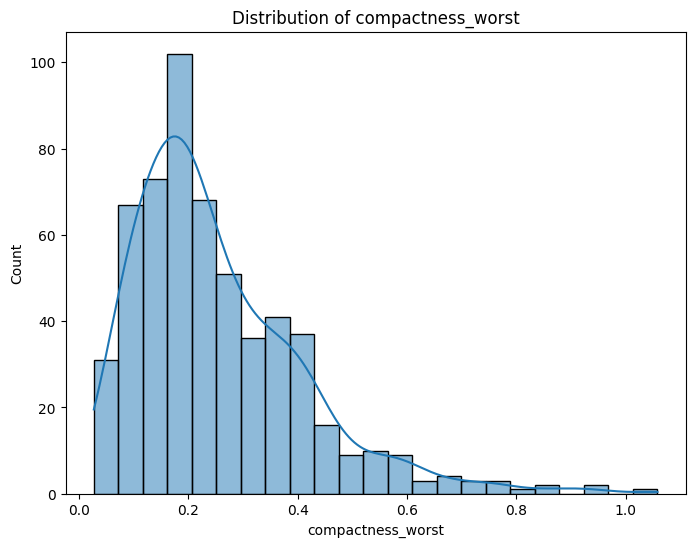

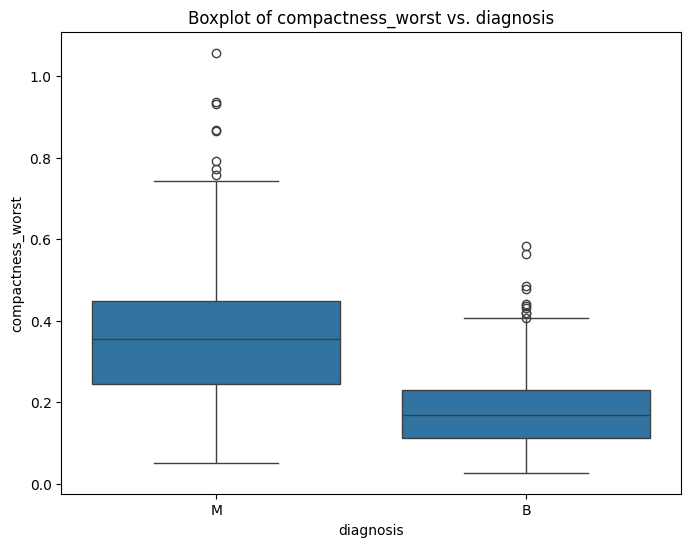

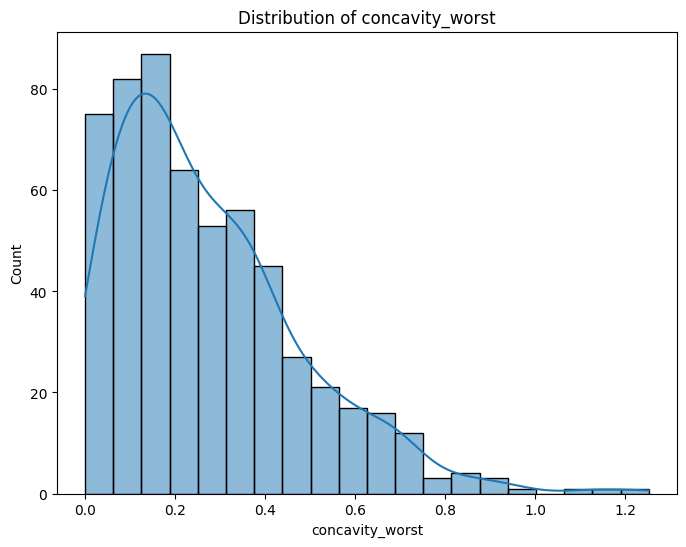

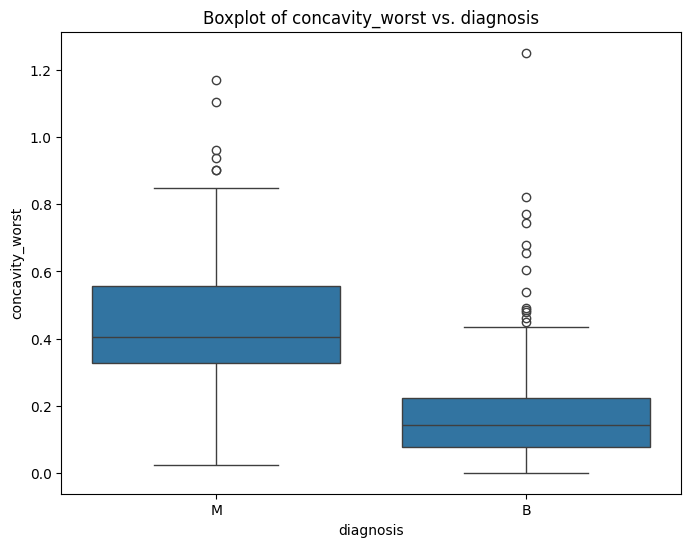

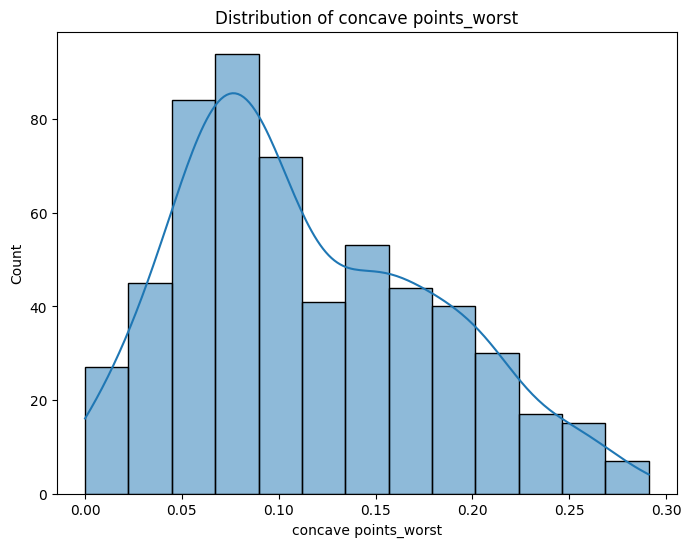

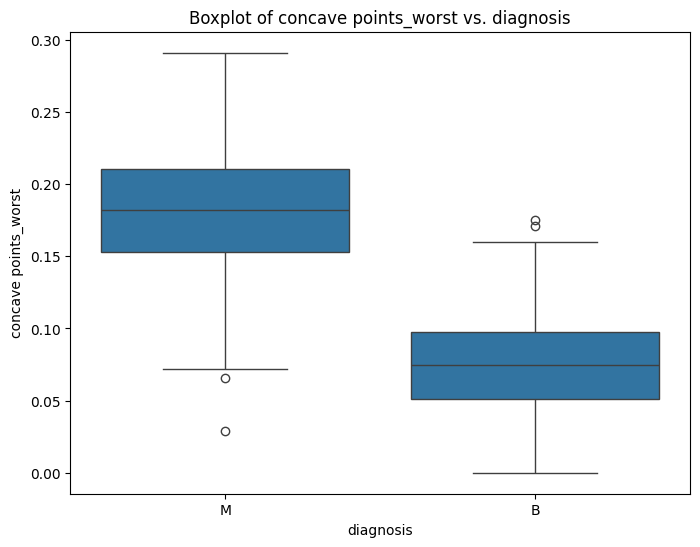

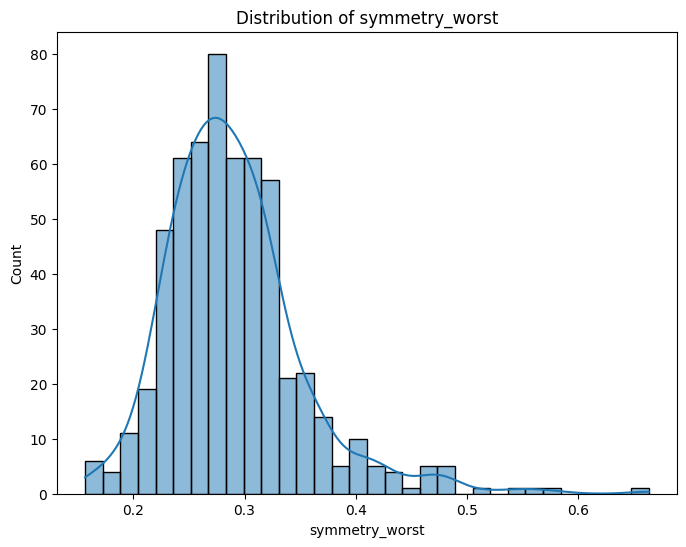

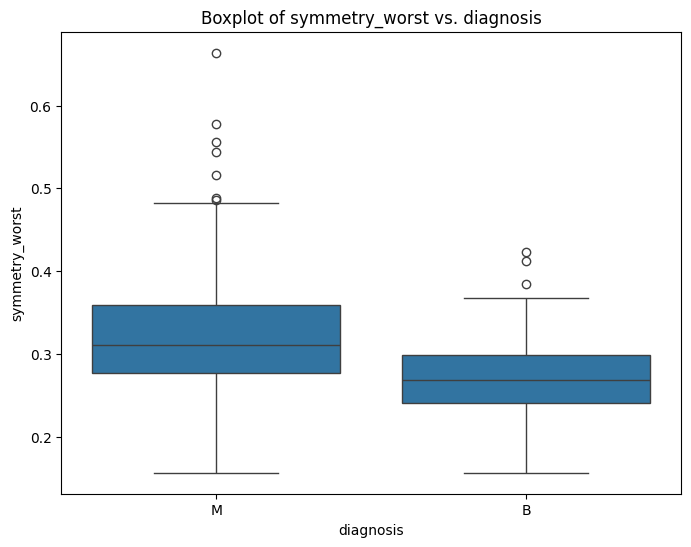

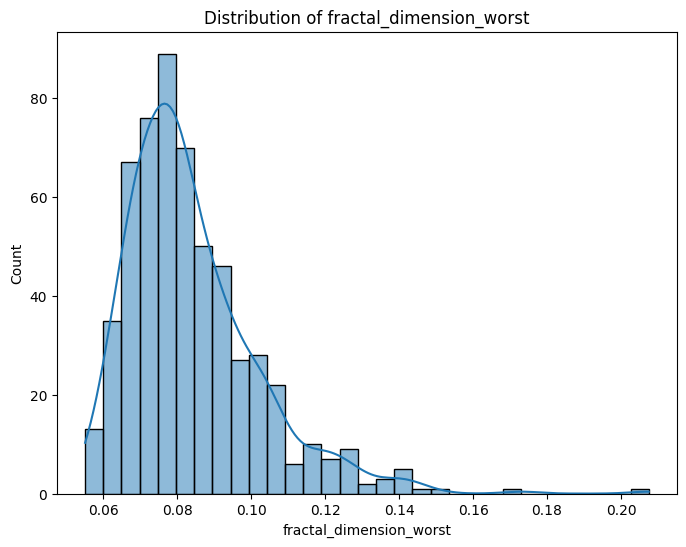

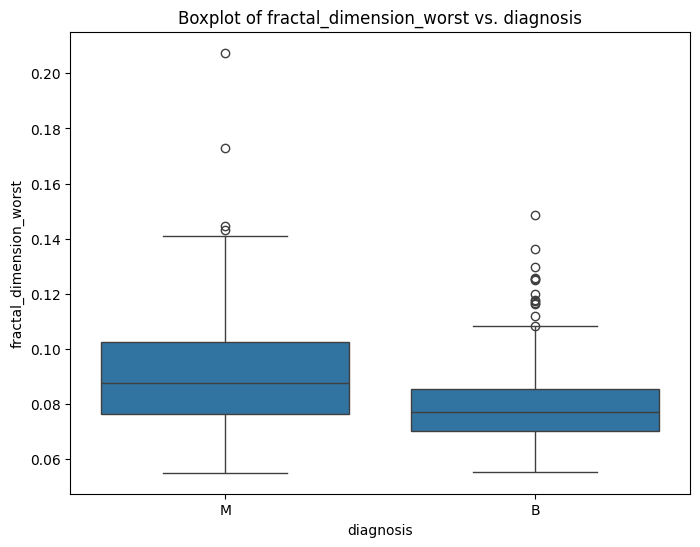

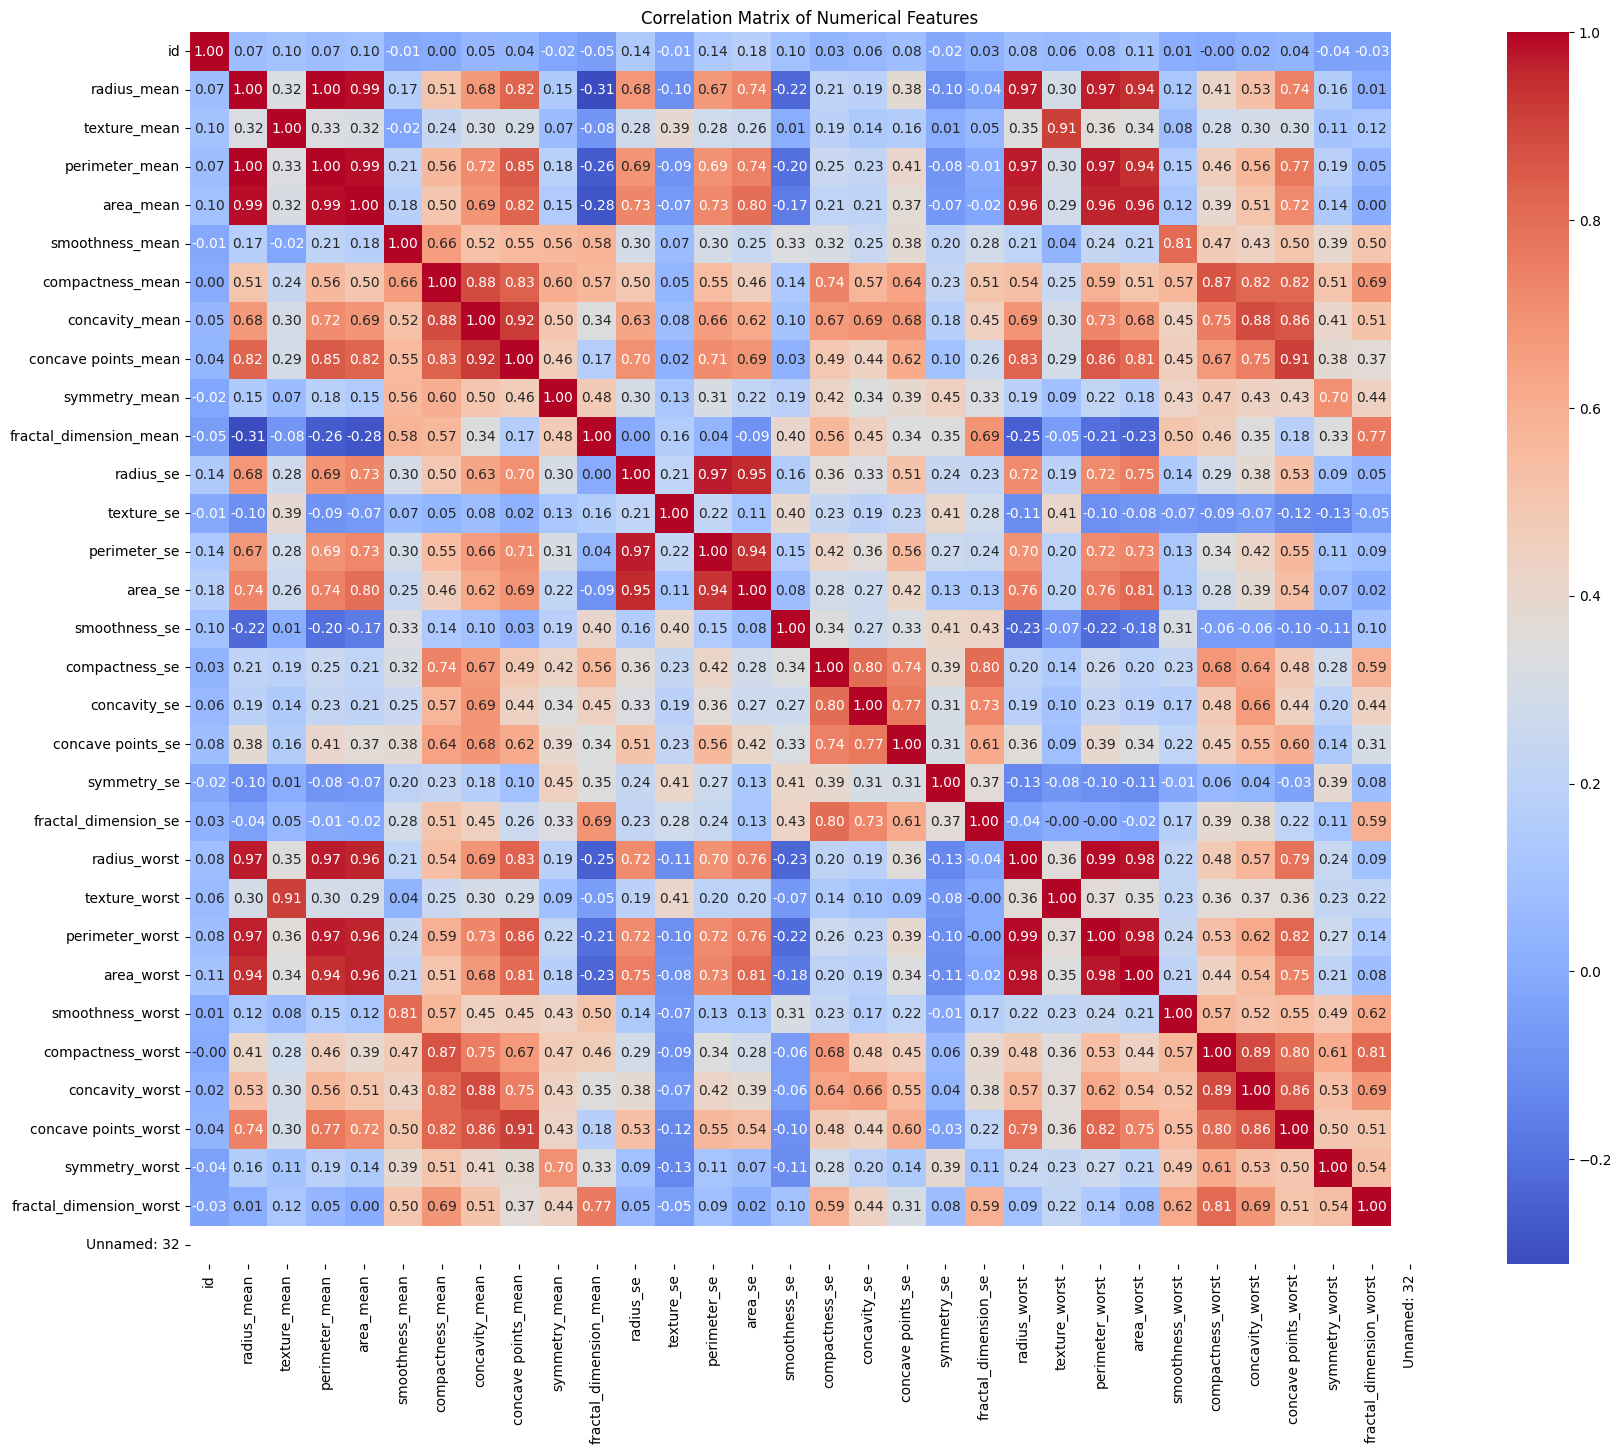

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze feature distributions
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_features:
    if col != 'Unnamed: 32' and col != 'id':
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='diagnosis', y=col, data=df)
        plt.title(f'Boxplot of {col} vs. diagnosis')
        plt.show()

# Correlation analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(20, 16))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the data by dropping the 'Unnamed: 32' column and the 'id' column, which are not relevant for the prediction task.


**Reasoning**:
Drop the irrelevant columns 'Unnamed: 32' and 'id' from the DataFrame `df` and verify the changes.



In [4]:
# Drop the irrelevant columns
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)

# Verify the changes
print("New data shape:", df.shape)
print("Columns:", df.columns.values)

New data shape: (569, 31)
Columns: ['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


## Data preparation

### Subtask:
Prepare the data for model training by encoding the categorical feature 'diagnosis' and scaling the numerical features.


**Reasoning**:
Encode the target variable 'diagnosis', split the data into features (X) and target (y), and scale the numerical features using StandardScaler.



In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode the target variable
le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])
# Ensure 'M' is 1 and 'B' is 0
mapping = {'M': 1, 'B': 0}
df['diagnosis_encoded'] = df['diagnosis'].map(mapping)

# Separate features and target variable
X = df.drop(columns=['diagnosis', 'diagnosis_encoded'])
y = df['diagnosis_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)
print(y.shape)

(569, 30)
(569,)


## Model training

### Subtask:
Train a Random Forest Classifier


**Reasoning**:
Train a RandomForestClassifier on the prepared training data and make predictions on the test set.



In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

## Model evaluation

### Subtask:
Evaluate the performance of the trained Random Forest model.


**Reasoning**:
Evaluate the performance of the trained Random Forest model using various metrics and visualizations.



Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1-score: 0.9524
AUC-ROC: 0.9581


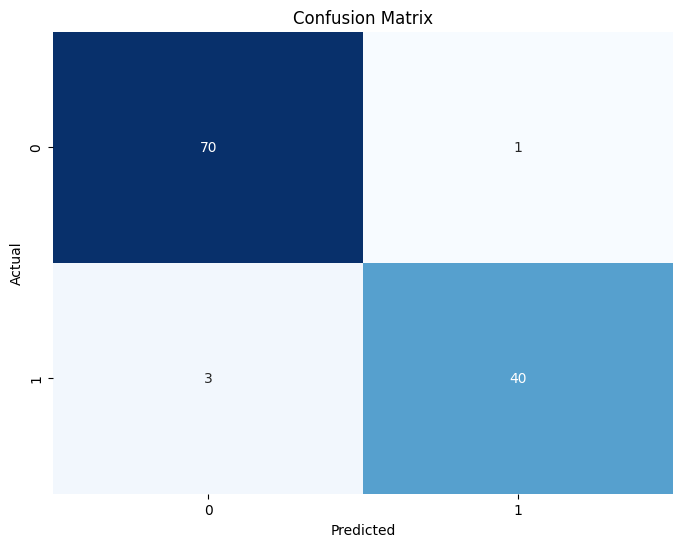

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

## Summary:

### Q&A
No questions were posed in the task.

### Data Analysis Key Findings
* The dataset contains information about breast cancer diagnosis, with 'diagnosis' as the target variable ('M' for malignant, 'B' for benign).
* An 'Unnamed: 32' column and an 'id' column were identified as irrelevant and removed.
* The 'diagnosis' column was label encoded (M=1, B=0).
* Numerical features were scaled using StandardScaler.
* A Random Forest Classifier was trained and achieved an accuracy of 0.9649, precision of 0.9756, recall of 0.9302, F1-score of 0.9524, and AUC-ROC of 0.9581 on the test set.

### Insights or Next Steps
* The Random Forest model shows promising results, but further hyperparameter tuning might improve performance, especially recall.
* Explore feature importance from the Random Forest model to understand which features are most influential in predicting the diagnosis.
